In [1]:
import pandas as pd
import numpy as np

In [2]:
# read the dataset and show first five dataset 
file_path = '~/Downloads/INF2178_A1_data.xlsx'
data = pd.read_excel(file_path)
data.head(5)

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [3]:
# found out the CAPACITY_ACTUAL_BED	OCCUPIED_BEDS	CAPACITY_ACTUAL_ROOM	OCCUPIED_ROOMS are the same data,
# but split into two rooms and beds, combine the data and call it combined_capacity and combined_occupied
data['COMBINED_CAPACITY'] = data['CAPACITY_ACTUAL_BED'].fillna(data['CAPACITY_ACTUAL_ROOM'])
data['COMBINED_OCCUPIED'] = data['OCCUPIED_BEDS'].fillna(data['OCCUPIED_ROOMS'])

# Dropping the uesless columns
data = data.drop(columns=['PROGRAM_NAME','OCCUPANCY_DATE', 'ORGANIZATION_NAME', 'PROGRAM_ID', 'OVERNIGHT_SERVICE_TYPE','SECTOR','CAPACITY_ACTUAL_BED', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_BEDS', 'OCCUPIED_ROOMS','CAPACITY_TYPE'])
data['CAPACITY_OCCUPIED_DIFF'] = data['COMBINED_CAPACITY'] - data['COMBINED_OCCUPIED']

data.head(5)

,PROGRAM_MODEL,PROGRAM_AREA,SERVICE_USER_COUNT,COMBINED_CAPACITY,COMBINED_OCCUPIED,CAPACITY_OCCUPIED_DIFF
0,Emergency,COVID-19 Response,74,29.0,26.0,3.0
1,Emergency,COVID-19 Response,3,3.0,3.0,0.0
2,Emergency,COVID-19 Response,24,28.0,23.0,5.0
3,Emergency,COVID-19 Response,25,17.0,17.0,0.0
4,Emergency,COVID-19 Response,13,14.0,13.0,1.0


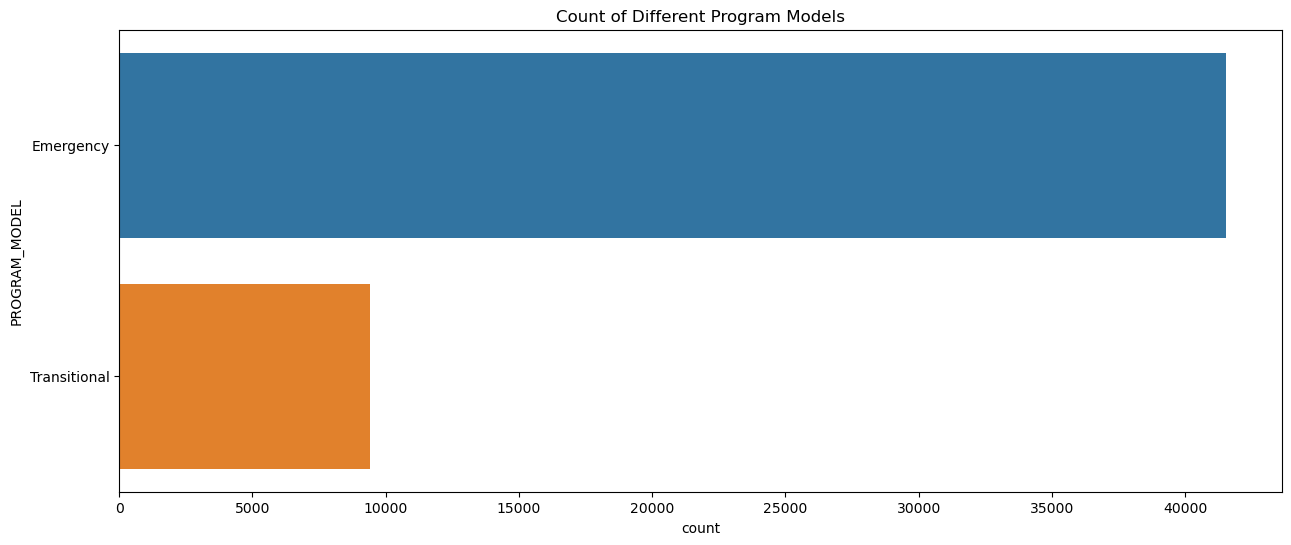

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting count plot for PROGRAM_MODEL
plt.figure(figsize=(15, 6))
sns.countplot(y=data['PROGRAM_MODEL'])
plt.title('Count of Different Program Models')
plt.show()

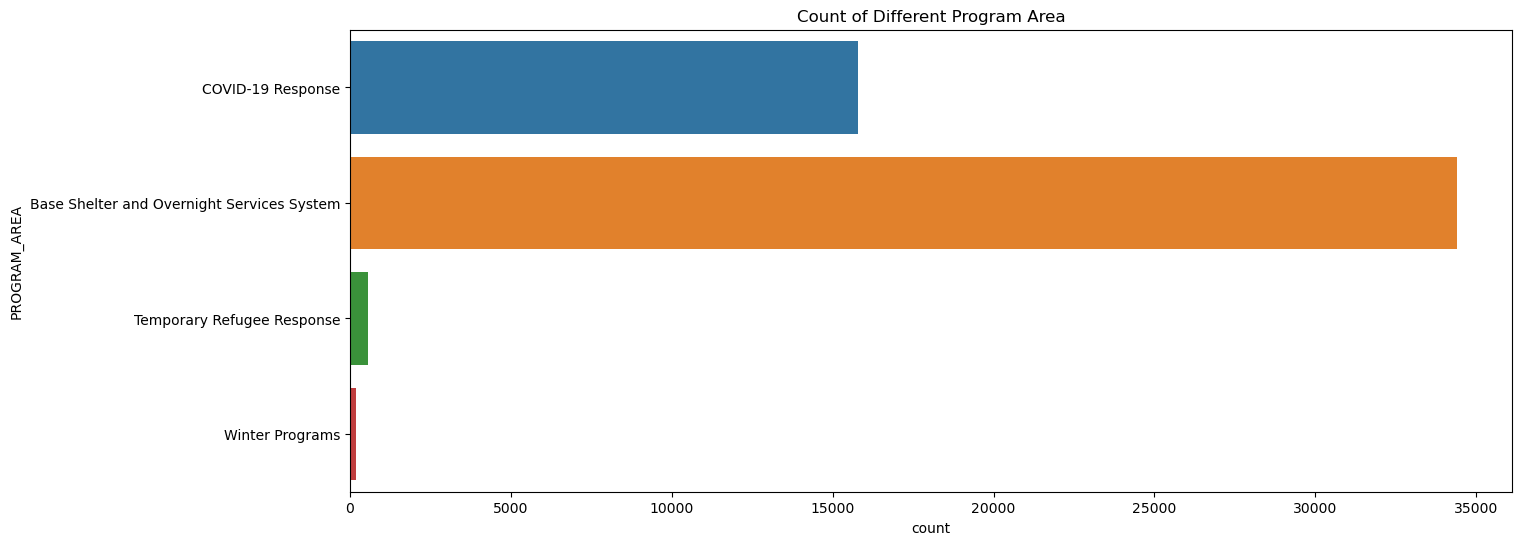

In [5]:
# Plotting count plot for PROGRAM_AREA
plt.figure(figsize=(15, 6))
sns.countplot(y=data['PROGRAM_AREA'])
plt.title('Count of Different Program Area')
plt.show()

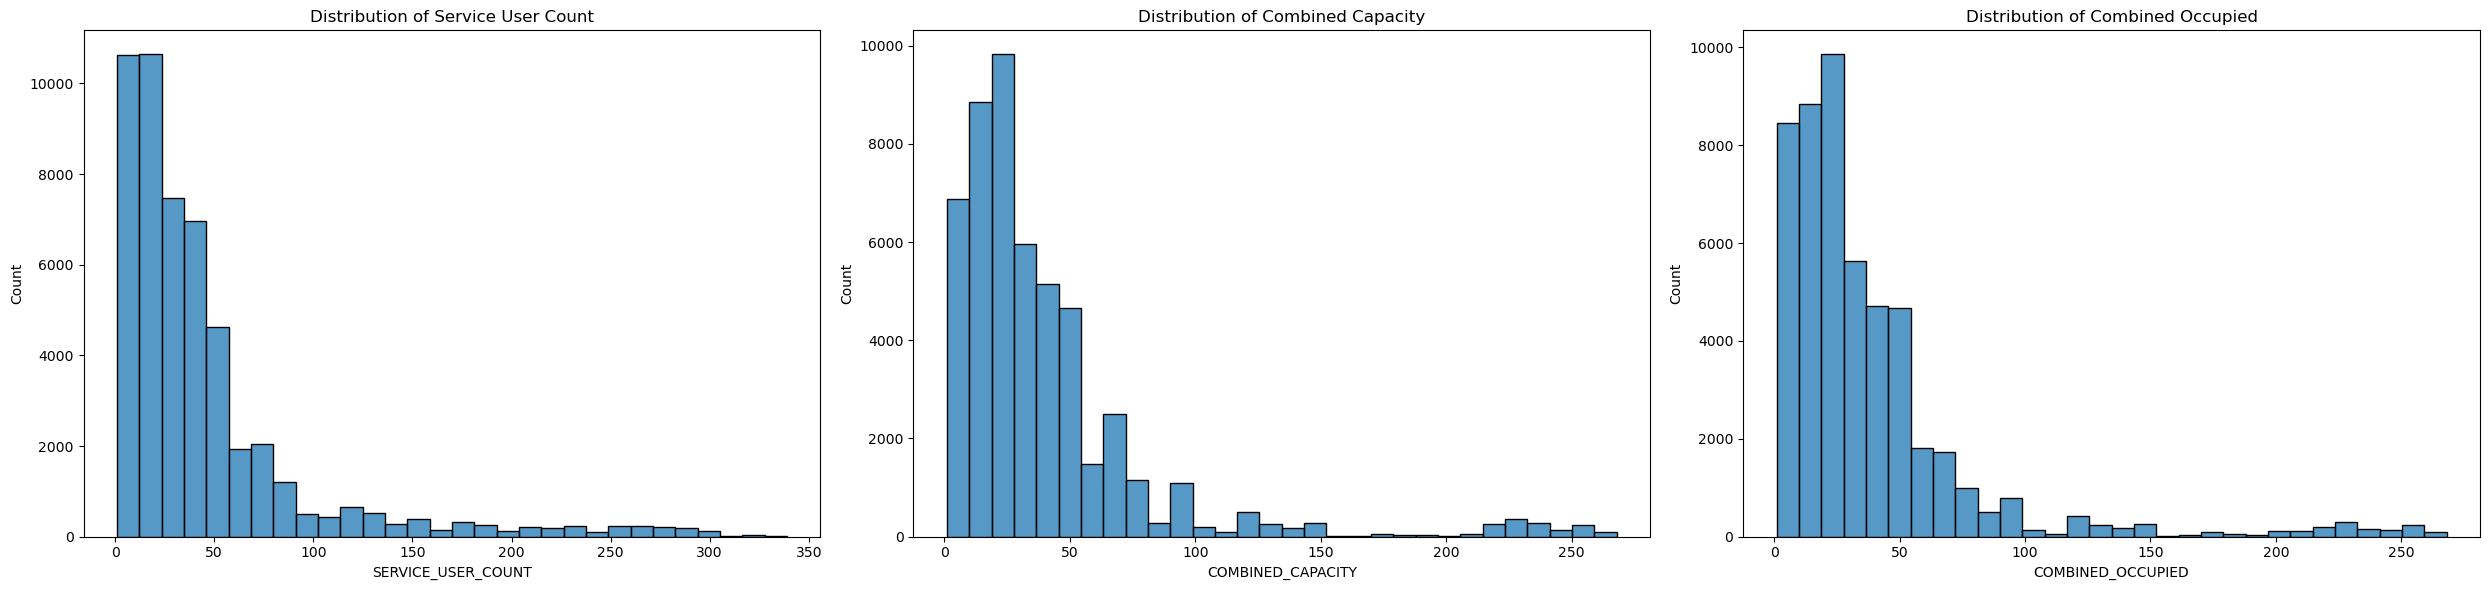

In [6]:
# Plotting histograms for numerical data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))
sns.histplot(data['SERVICE_USER_COUNT'], bins=30, ax=axes[0])
axes[0].set_title('Distribution of Service User Count')

sns.histplot(data['COMBINED_CAPACITY'], bins=30, ax=axes[1])
axes[1].set_title('Distribution of Combined Capacity')

sns.histplot(data['COMBINED_OCCUPIED'], bins=30, ax=axes[2])
axes[2].set_title('Distribution of Combined Occupied')

plt.tight_layout()
plt.show()

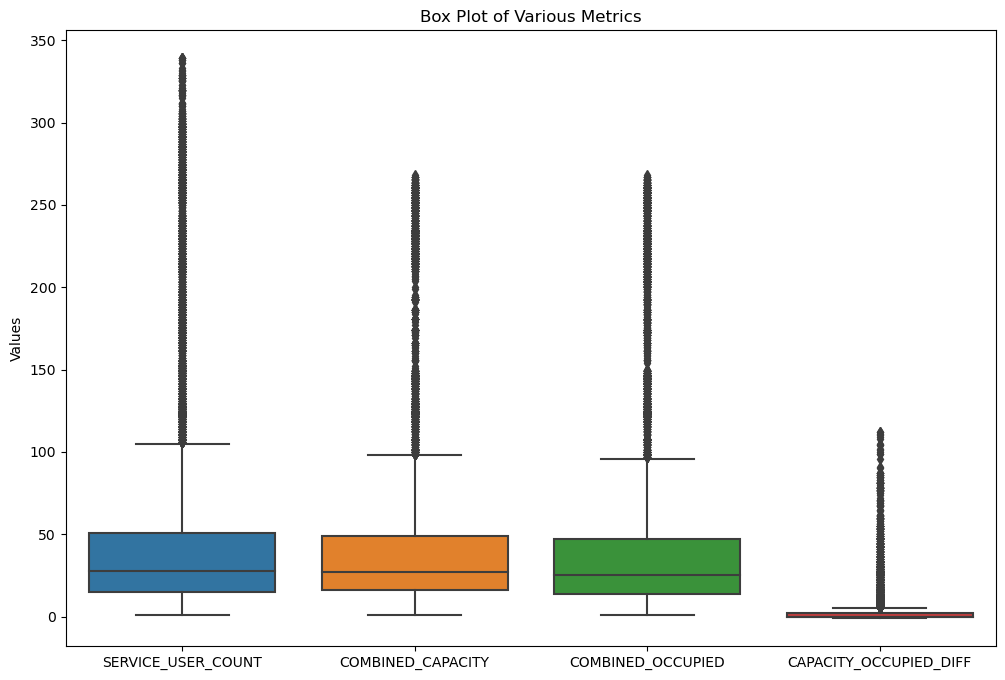

In [7]:
# apply boxplot before data clean
plot_data = data[['SERVICE_USER_COUNT', 'COMBINED_CAPACITY', 'COMBINED_OCCUPIED', 'CAPACITY_OCCUPIED_DIFF']]

# Creating the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=plot_data)
plt.title('Box Plot of Various Metrics')
plt.ylabel('Values')
plt.show()

In [8]:
# Select only numeric columns for IQR calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate IQR for each numeric column
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_clean = numeric_data[~((numeric_data < (Q1 - 2 * IQR)) | (numeric_data > (Q3 + 2 * IQR))).any(axis=1)]
data_clean

,SERVICE_USER_COUNT,COMBINED_CAPACITY,COMBINED_OCCUPIED,CAPACITY_OCCUPIED_DIFF
0,74,29.0,26.0,3.0
1,3,3.0,3.0,0.0
2,24,28.0,23.0,5.0
3,25,17.0,17.0,0.0
4,13,14.0,13.0,1.0
...,...,...,...,...
50938,16,19.0,16.0,3.0
50940,23,23.0,23.0,0.0
50941,13,14.0,13.0,1.0
50942,10,10.0,10.0,0.0


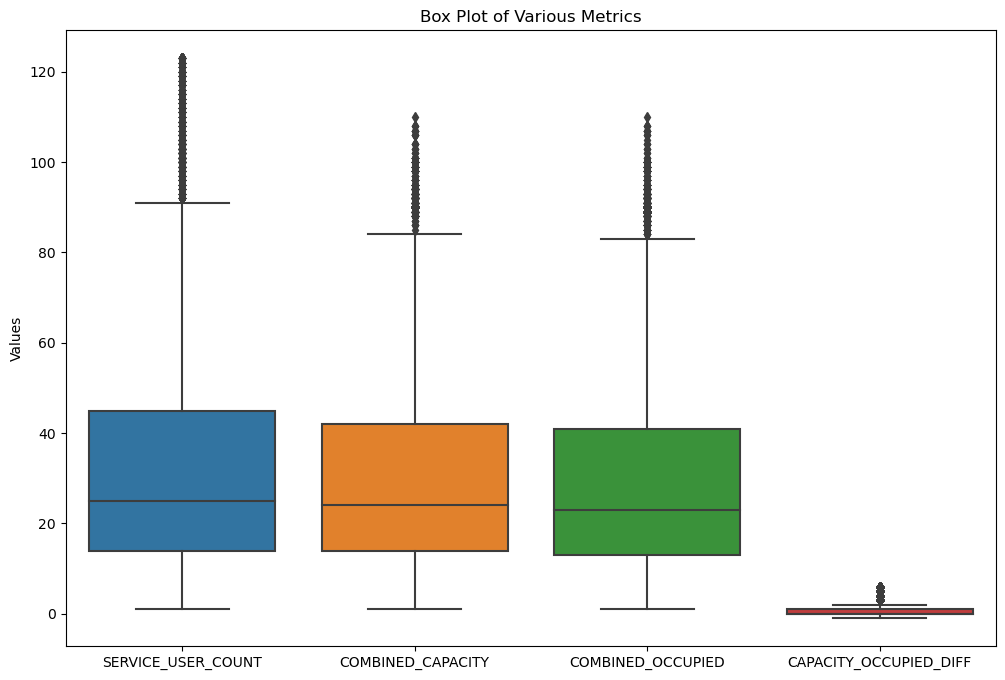

In [9]:
plot_data = data_clean[['SERVICE_USER_COUNT', 'COMBINED_CAPACITY', 'COMBINED_OCCUPIED', 'CAPACITY_OCCUPIED_DIFF']]

# Creating the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=plot_data)
plt.title('Box Plot of Various Metrics')
plt.ylabel('Values')
plt.show()

In [10]:
# apply describe data method
descriptive_stats = data_clean.describe()
descriptive_stats

,SERVICE_USER_COUNT,COMBINED_CAPACITY,COMBINED_OCCUPIED,CAPACITY_OCCUPIED_DIFF
count,43368.000000,43368.000000,43368.000000,43368.000000
mean,31.832411,29.411663,28.497833,0.913830
std,24.084765,20.886510,20.822880,1.460473
min,1.000000,1.000000,1.000000,-1.000000
25%,14.000000,14.000000,13.000000,0.000000
50%,25.000000,24.000000,23.000000,0.000000
75%,45.000000,42.000000,41.000000,1.000000
max,123.000000,110.000000,110.000000,6.000000


In [11]:
correlation_matrix = data_clean[['SERVICE_USER_COUNT', 'COMBINED_CAPACITY', 'COMBINED_OCCUPIED', 'CAPACITY_OCCUPIED_DIFF' ]].corr()
correlation_matrix

,SERVICE_USER_COUNT,COMBINED_CAPACITY,COMBINED_OCCUPIED,CAPACITY_OCCUPIED_DIFF
SERVICE_USER_COUNT,1.000000,0.876222,0.879153,-0.003609
COMBINED_CAPACITY,0.876222,1.000000,0.997552,0.078464
COMBINED_OCCUPIED,0.879153,0.997552,1.000000,0.008566
CAPACITY_OCCUPIED_DIFF,-0.003609,0.078464,0.008566,1.000000


In [12]:
data_clean

,SERVICE_USER_COUNT,COMBINED_CAPACITY,COMBINED_OCCUPIED,CAPACITY_OCCUPIED_DIFF
0,74,29.0,26.0,3.0
1,3,3.0,3.0,0.0
2,24,28.0,23.0,5.0
3,25,17.0,17.0,0.0
4,13,14.0,13.0,1.0
...,...,...,...,...
50938,16,19.0,16.0,3.0
50940,23,23.0,23.0,0.0
50941,13,14.0,13.0,1.0
50942,10,10.0,10.0,0.0


In [13]:
# T-Test
from scipy import stats

In [14]:
# Pair group for SERVICE_USER_COUNT and COMBINED_OCCUPIED:  
stats.ttest_rel(data_clean['SERVICE_USER_COUNT'], data_clean['COMBINED_OCCUPIED'])

TtestResult(statistic=60.47571413192872, pvalue=0.0, df=43367)

In [15]:
# Independent Two-Sample T-Test for COMBINED_CAPACITY and COMBINED_OCCUPIED: 
stats.ttest_ind(data_clean['COMBINED_CAPACITY'], data_clean['COMBINED_OCCUPIED'])

TtestResult(statistic=6.452544243959994, pvalue=1.1056478146980916e-10, df=86734.0)

In [16]:
# another process for split the data based on the CAPACITY_TYPE
data_type = pd.read_excel(file_path)
# split the dataset into rooms and beds
dataset_room = data_type[data_type['CAPACITY_TYPE'] == 'Room Based Capacity']
dataset_bed = data_type[data_type['CAPACITY_TYPE'] == 'Bed Based Capacity']

In [17]:
# drop useless columns and name it dataset_bed
dataset_bed = dataset_bed.drop(columns=['PROGRAM_NAME','OCCUPANCY_DATE', 'ORGANIZATION_NAME', 'PROGRAM_ID', 'OVERNIGHT_SERVICE_TYPE','SECTOR','CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS','PROGRAM_AREA','CAPACITY_TYPE'])
dataset_room = dataset_room.drop(columns=['PROGRAM_NAME','OCCUPANCY_DATE', 'ORGANIZATION_NAME', 'PROGRAM_ID', 'OVERNIGHT_SERVICE_TYPE','SECTOR','OCCUPIED_BEDS', 'CAPACITY_ACTUAL_BED','PROGRAM_AREA','CAPACITY_TYPE'])

In [18]:
# for dataset bed and room split the data by emergency and Transitional
dataset_bed_Emergency = dataset_bed[dataset_bed['PROGRAM_MODEL'] == 'Emergency']
dataset_bed_Transitional = dataset_bed[dataset_bed['PROGRAM_MODEL'] == 'Transitional']
dataset_room_Emergency = dataset_room[dataset_room['PROGRAM_MODEL'] == 'Emergency']
dataset_room_Transitional = dataset_room[dataset_room['PROGRAM_MODEL'] == 'Transitional']

In [19]:
# drop the PROGRAM_MODEL for each sub dataset
dataset_bed_Emergency = dataset_bed_Emergency.drop(columns=['PROGRAM_MODEL'])
dataset_bed_Transitional = dataset_bed_Transitional.drop(columns=['PROGRAM_MODEL'])
dataset_room_Emergency = dataset_room_Emergency.drop(columns=['PROGRAM_MODEL'])
dataset_room_Transitional = dataset_room_Transitional.drop(columns=['PROGRAM_MODEL'])

In [20]:
dataset_bed_Emergency

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS
5,6,8.0,6.0
10,22,24.0,22.0
11,8,12.0,8.0
25,11,12.0,11.0
37,51,51.0,51.0
...,...,...,...
50937,22,24.0,22.0
50938,16,19.0,16.0
50939,6,20.0,6.0
50940,23,23.0,23.0


In [21]:
dataset_bed_Transitional

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS
21,10,12.0,10.0
29,32,32.0,32.0
31,23,23.0,23.0
36,61,66.0,61.0
41,18,22.0,18.0
...,...,...,...
50905,15,15.0,15.0
50908,24,25.0,24.0
50935,22,25.0,22.0
50941,13,14.0,13.0


In [22]:
dataset_room_Emergency

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,74,29.0,26.0
1,3,3.0,3.0
2,24,28.0,23.0
3,25,17.0,17.0
4,13,14.0,13.0
...,...,...,...
50920,128,128.0,128.0
50923,76,76.0,76.0
50927,10,3.0,3.0
50932,74,23.0,22.0


In [23]:
dataset_room_Transitional

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
109,168,63.0,52.0
111,60,27.0,20.0
250,168,63.0,52.0
252,60,27.0,20.0
391,168,63.0,52.0
...,...,...,...
50645,63,23.0,22.0
50778,221,63.0,63.0
50780,63,23.0,22.0
50914,219,63.0,62.0


In [26]:
dataset_bed_Emergency = dataset_bed_Emergency.dropna()

In [27]:
dataset_bed_Emergency

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS
5,6,8.0,6.0
10,22,24.0,22.0
11,8,12.0,8.0
25,11,12.0,11.0
37,51,51.0,51.0
...,...,...,...
50937,22,24.0,22.0
50938,16,19.0,16.0
50939,6,20.0,6.0
50940,23,23.0,23.0


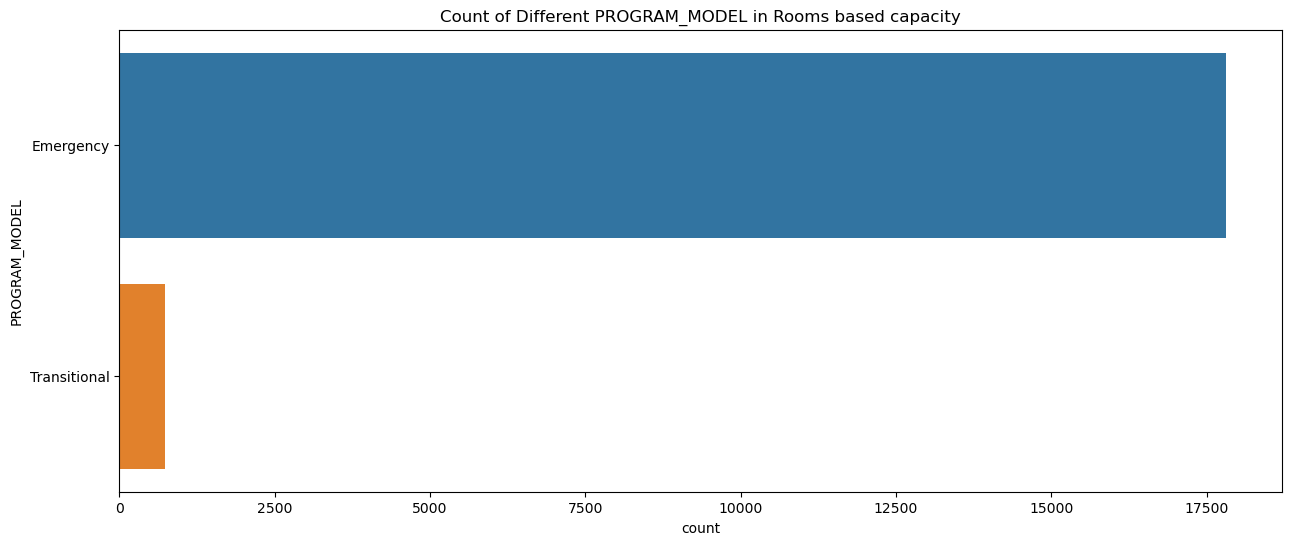

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting count plot for PROGRAM_MODEL for rooms
plt.figure(figsize=(15, 6))
sns.countplot(y=dataset_room['PROGRAM_MODEL'])
plt.title('Count of Different PROGRAM_MODEL in Rooms based capacity')
plt.show()

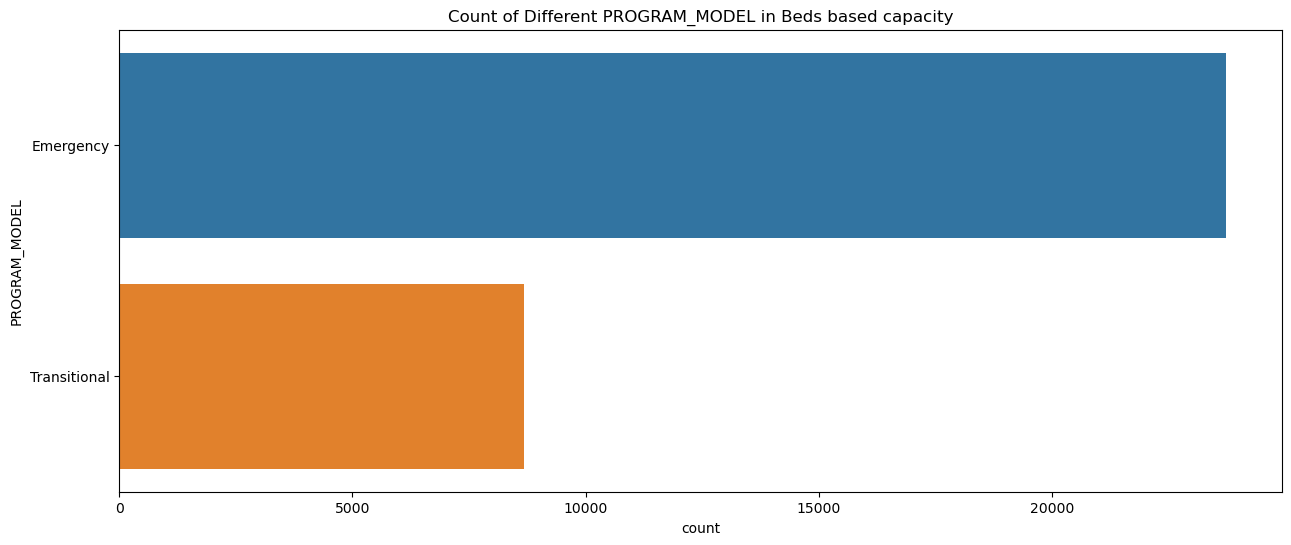

In [31]:
# Plotting count plot for PROGRAM_MODEL for rooms
plt.figure(figsize=(15, 6))
sns.countplot(y=dataset_bed['PROGRAM_MODEL'])
plt.title('Count of Different PROGRAM_MODEL in Beds based capacity')
plt.show()

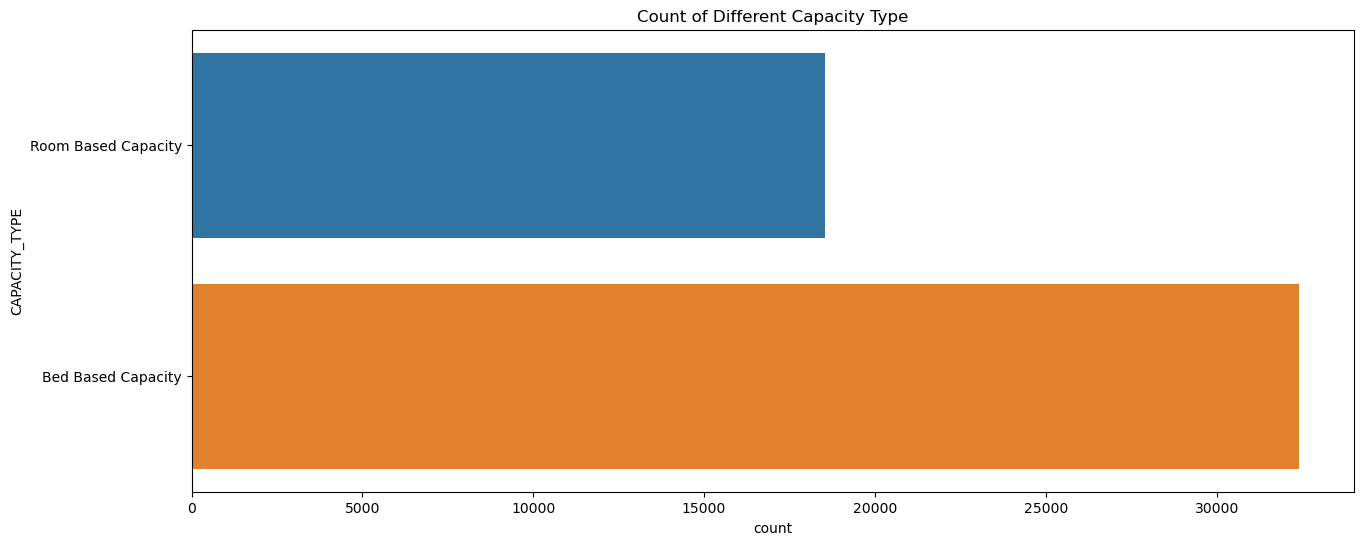

In [30]:
# Plotting count plot for CAPACITY_TYPE
plt.figure(figsize=(15, 6))
sns.countplot(y=data_type['CAPACITY_TYPE'])
plt.title('Count of Different Capacity Type')
plt.show()

In [32]:
dataset_bed_Emergency.describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS
count,23726.000000,23726.000000,23726.000000
mean,32.182711,33.833516,32.182711
std,28.573265,29.390146,28.573265
min,1.000000,1.000000,1.000000
25%,15.000000,16.000000,15.000000
50%,25.000000,25.000000,25.000000
75%,44.000000,45.000000,44.000000
max,234.000000,234.000000,234.000000


In [33]:
dataset_bed_Transitional.describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS
count,8671.000000,8671.000000,8671.000000
mean,23.210818,25.593703,23.210818
std,17.526459,18.342901,17.526459
min,1.000000,2.000000,1.000000
25%,11.000000,12.000000,11.000000
50%,21.000000,24.000000,21.000000
75%,27.000000,29.000000,27.000000
max,80.000000,83.000000,80.000000


In [35]:
dataset_room_Emergency.describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,17815.000000,17815.000000,17815.000000
mean,71.547011,56.010721,53.433679
std,72.928555,60.503601,59.799883
min,1.000000,1.000000,1.000000
25%,21.000000,18.000000,14.000000
50%,46.000000,35.000000,34.000000
75%,90.000000,71.000000,67.000000
max,339.000000,268.000000,268.000000


In [34]:
dataset_room_Transitional.describe()

,SERVICE_USER_COUNT,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
count,730.000000,730.000000,730.000000
mean,123.375342,44.287671,37.300000
std,64.765200,17.748494,17.114931
min,52.000000,23.000000,18.000000
25%,60.000000,27.000000,20.250000
50%,113.500000,42.500000,35.000000
75%,180.000000,63.000000,53.000000
max,221.000000,63.000000,63.000000


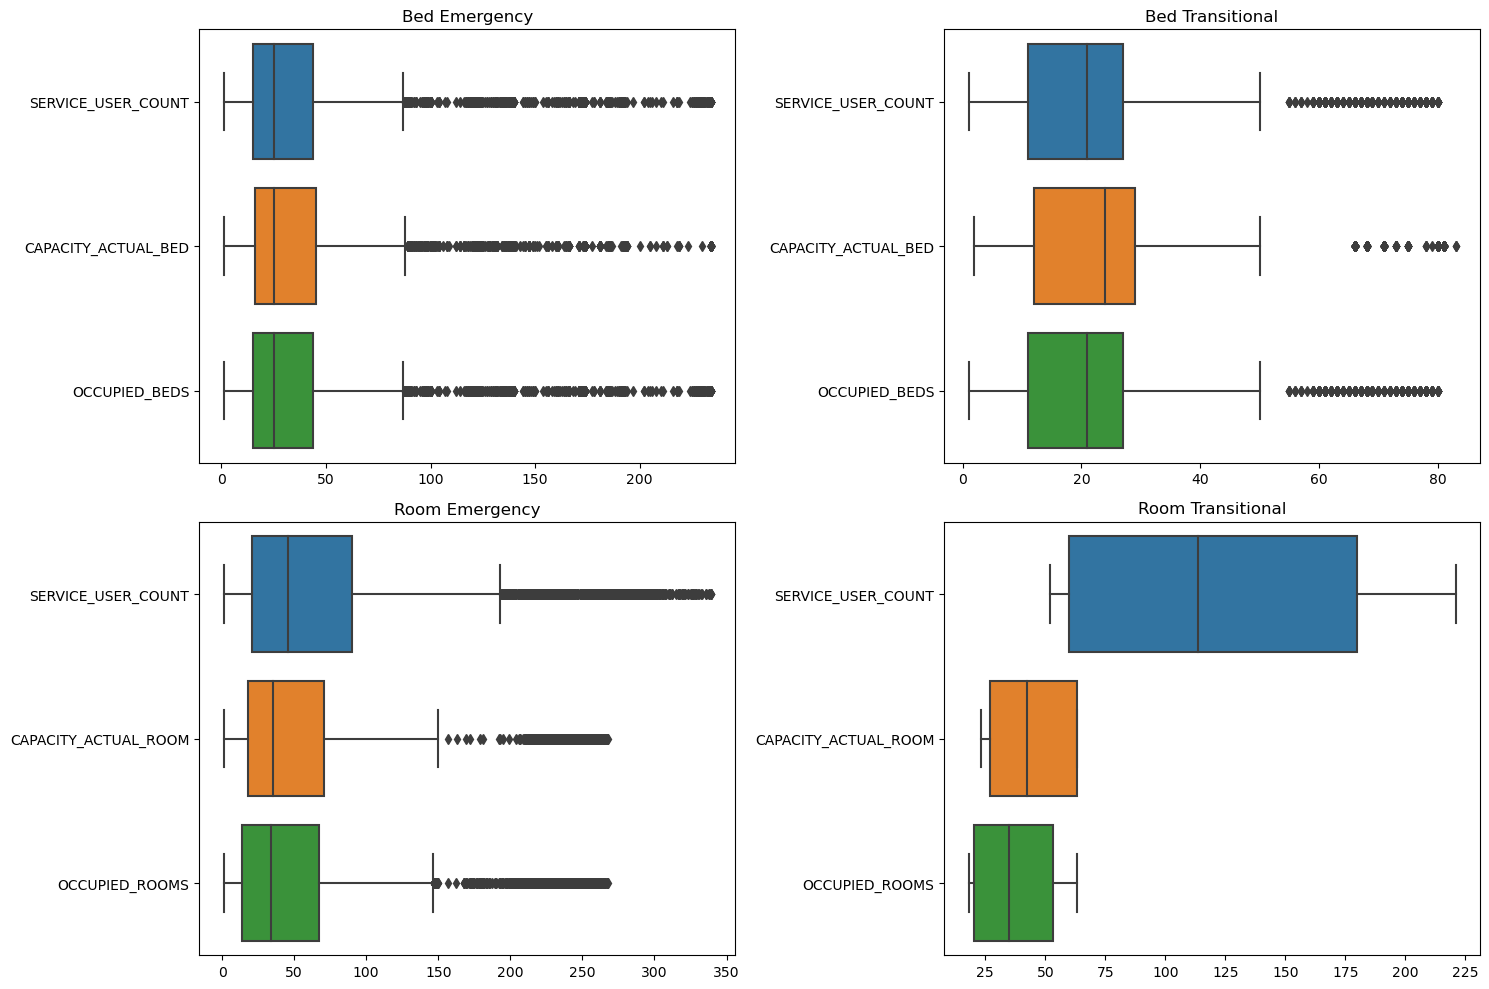

In [36]:
# Drawing box plots for each sub-dataset
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=dataset_bed_Emergency, orient='h')
axes[0, 0].set_title('Bed Emergency')

sns.boxplot(ax=axes[0, 1], data=dataset_bed_Transitional, orient='h')
axes[0, 1].set_title('Bed Transitional')

sns.boxplot(ax=axes[1, 0], data=dataset_room_Emergency, orient='h')
axes[1, 0].set_title('Room Emergency')

sns.boxplot(ax=axes[1, 1], data=dataset_room_Transitional, orient='h')
axes[1, 1].set_title('Room Transitional')

plt.tight_layout()
plt.show()

In [38]:
# detect outlier and remove for dataset_bed_Emergency dataset_bed_Transitional dataset_room_Emergency dataset_room_Transitional
def remove_outliers(df, column_list):
    for column in column_list:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
columns_to_check_bed = ['SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS']
columns_to_check_room = ['SERVICE_USER_COUNT', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']

dataset_bed_Emergency_clean = remove_outliers(dataset_bed_Emergency, columns_to_check_bed)
dataset_bed_Transitional_clean = remove_outliers(dataset_bed_Transitional, columns_to_check_bed)
dataset_room_Emergency_clean = remove_outliers(dataset_room_Emergency, columns_to_check_room)
dataset_room_Transitional_clean = remove_outliers(dataset_room_Transitional, columns_to_check_room)

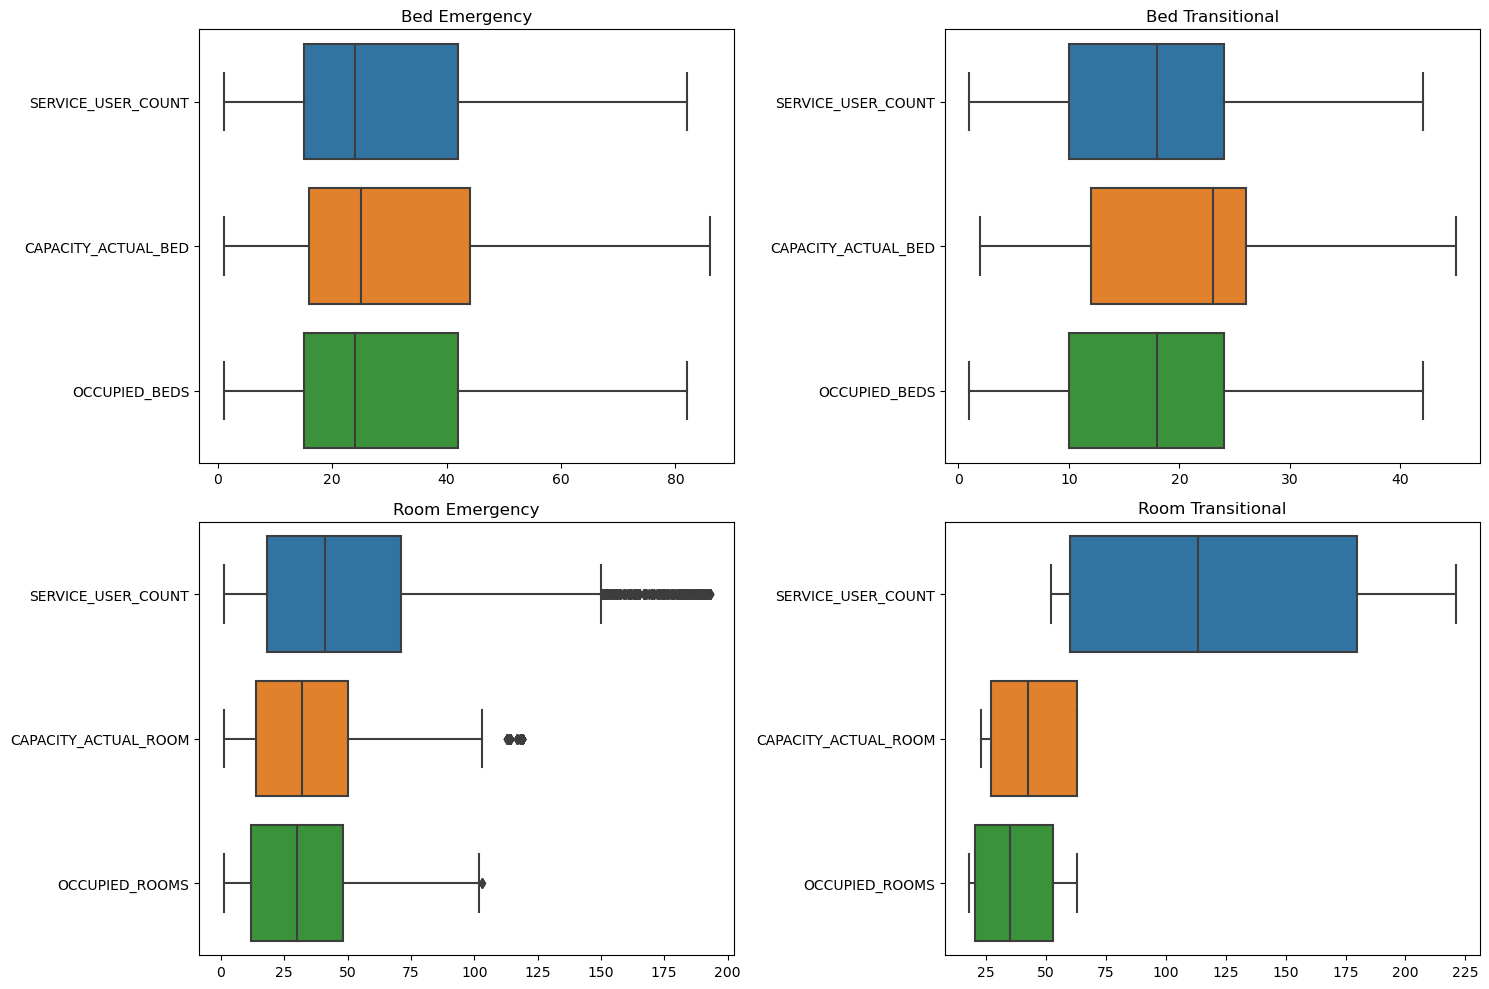

In [39]:
# Drawing box plots for each sub-dataset after clean
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=dataset_bed_Emergency_clean, orient='h')
axes[0, 0].set_title('Bed Emergency')

sns.boxplot(ax=axes[0, 1], data=dataset_bed_Transitional_clean, orient='h')
axes[0, 1].set_title('Bed Transitional')

sns.boxplot(ax=axes[1, 0], data=dataset_room_Emergency_clean, orient='h')
axes[1, 0].set_title('Room Emergency')

sns.boxplot(ax=axes[1, 1], data=dataset_room_Transitional_clean, orient='h')
axes[1, 1].set_title('Room Transitional')

plt.tight_layout()
plt.show()

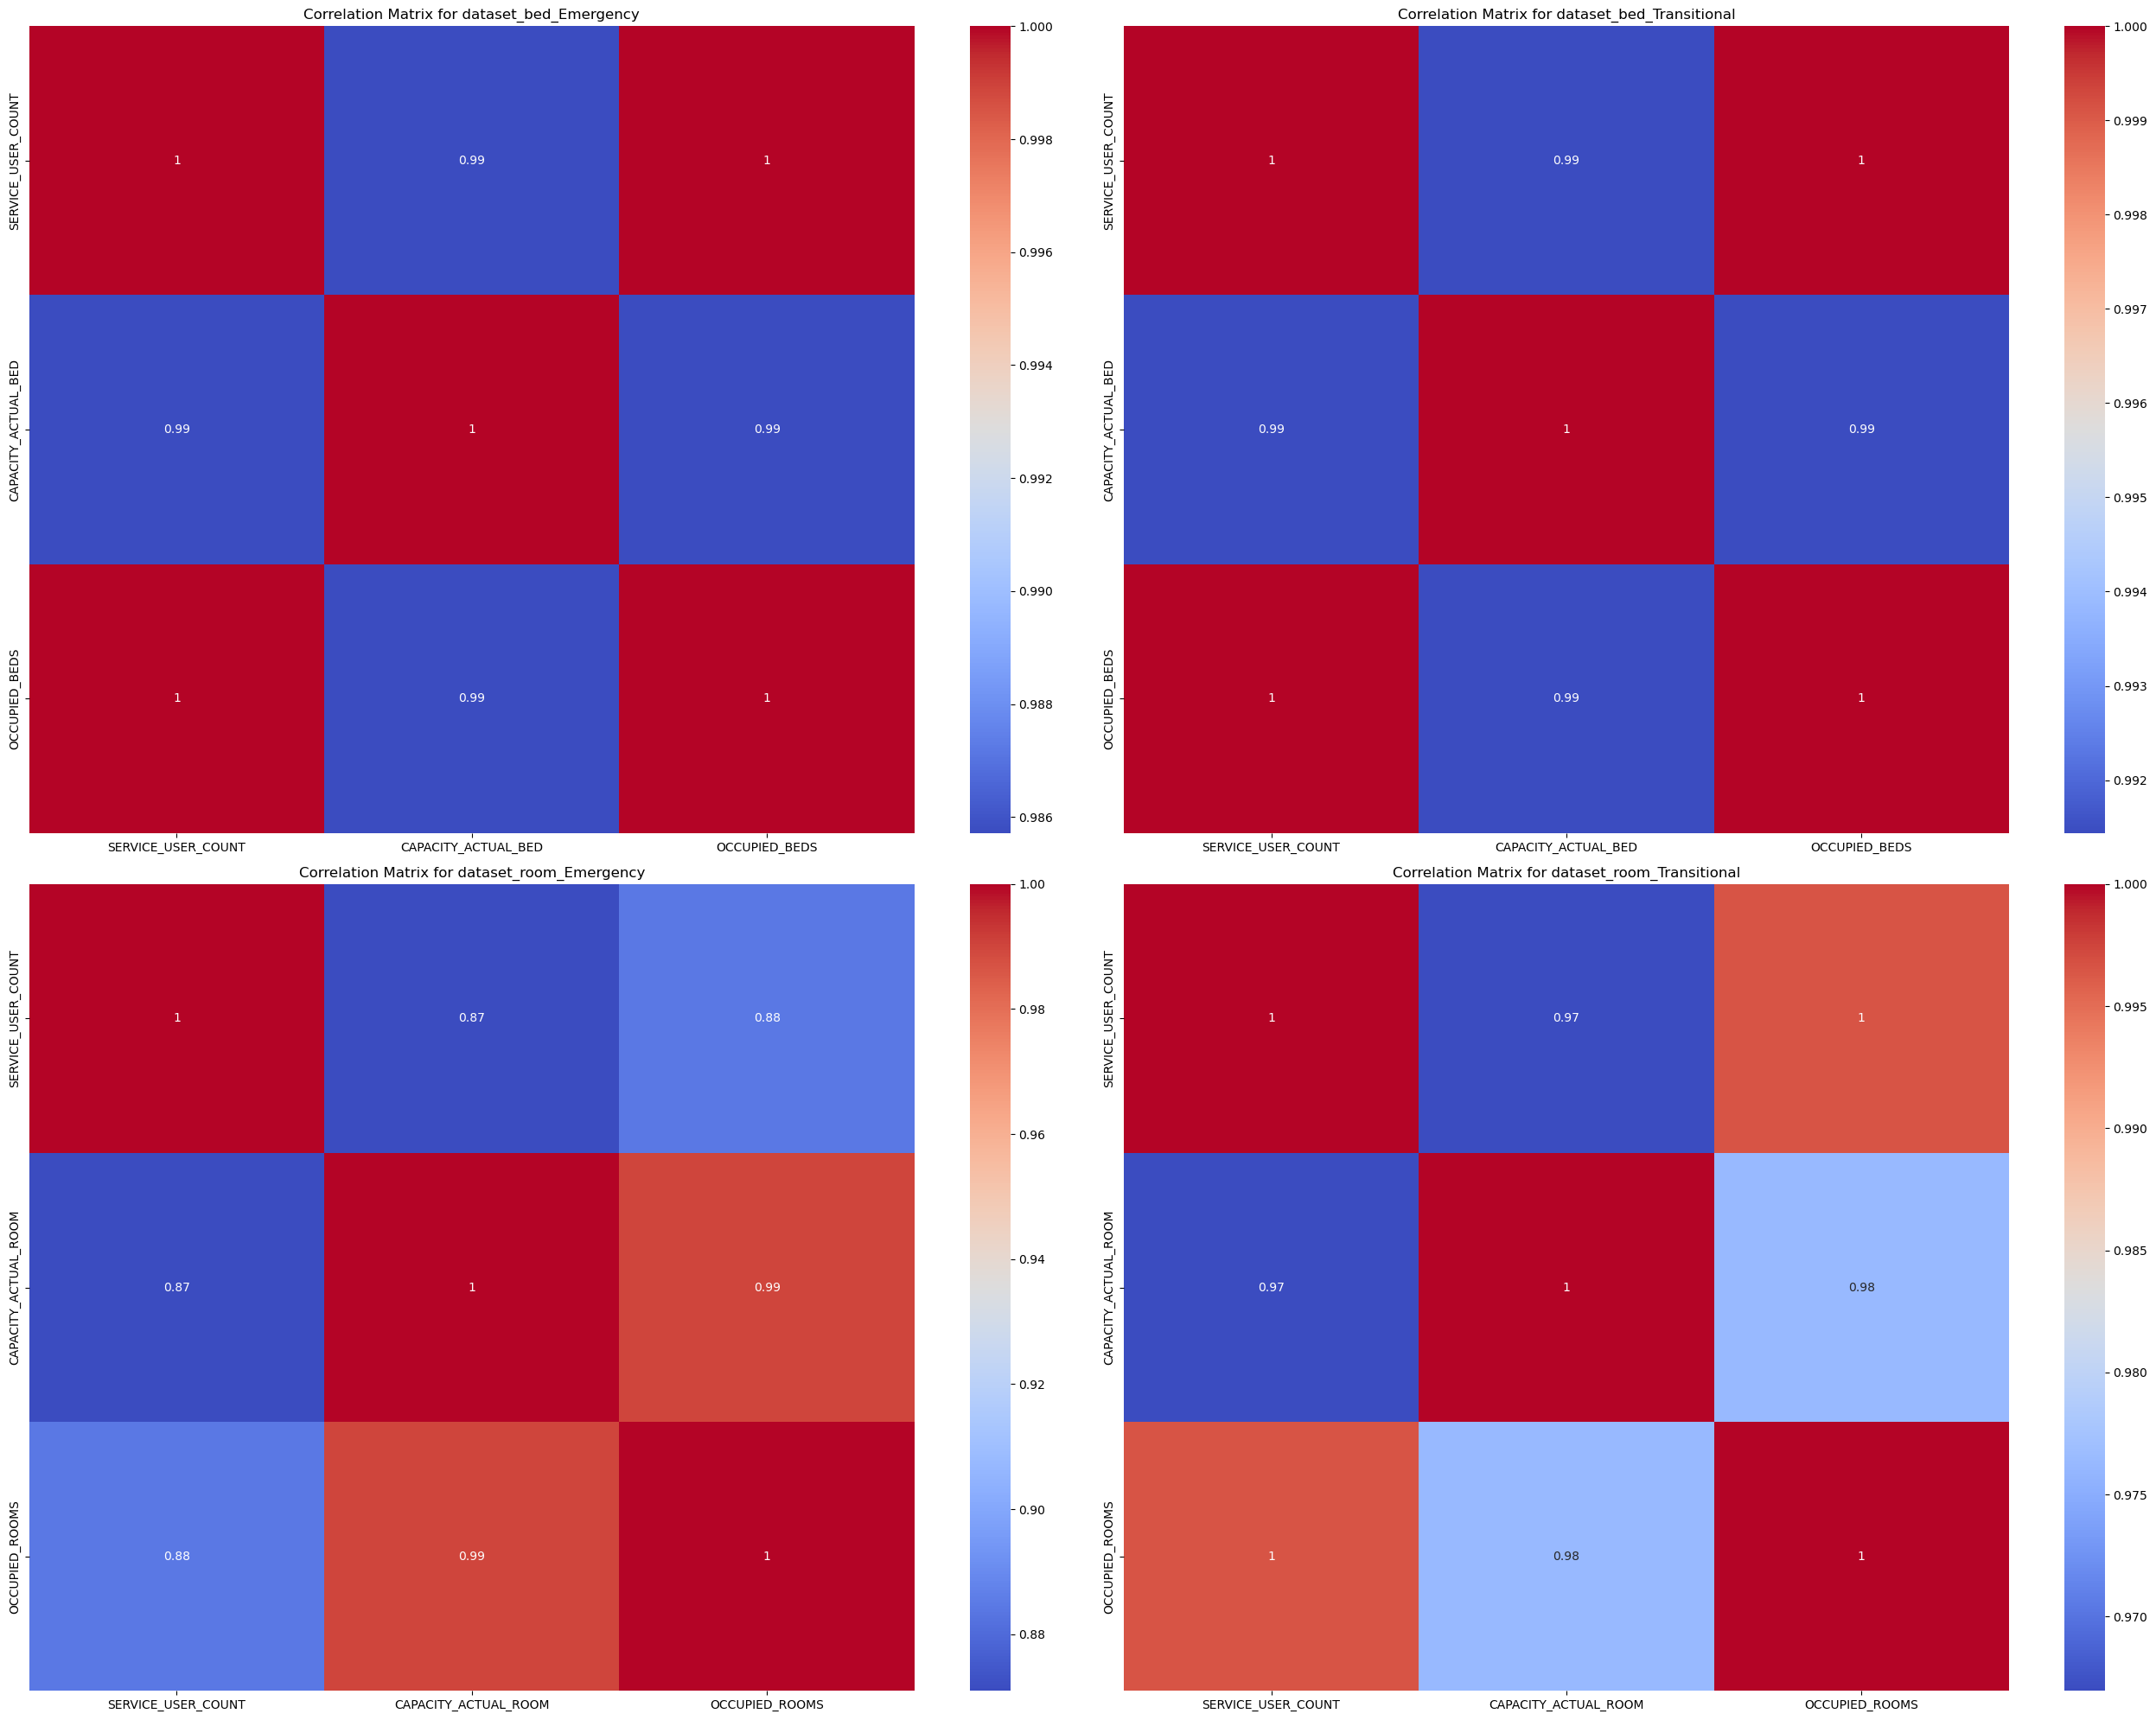

In [44]:
# Setting up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(26, 20))  # Adjust the size as needed

sns.heatmap(dataset_bed_Emergency.corr(), ax=axes[0, 0], annot=True, cmap='coolwarm')
axes[0, 0].set_title('Correlation Matrix for dataset_bed_Emergency')

sns.heatmap(dataset_bed_Transitional.corr(), ax=axes[0, 1], annot=True, cmap='coolwarm')
axes[0, 1].set_title('Correlation Matrix for dataset_bed_Transitional')

sns.heatmap(dataset_room_Emergency.corr(), ax=axes[1, 0], annot=True, cmap='coolwarm')
axes[1, 0].set_title('Correlation Matrix for dataset_room_Emergency')

sns.heatmap(dataset_room_Transitional.corr(), ax=axes[1, 1], annot=True, cmap='coolwarm')
axes[1, 1].set_title('Correlation Matrix for dataset_room_Transitional')

plt.tight_layout()
plt.show()

In [45]:
# Performing t-tests
# Compare Emergency vs Transitional in bed-based capacity
t_stat_bed, p_value_bed = stats.ttest_ind(
    dataset_bed_Emergency['SERVICE_USER_COUNT'], 
    dataset_bed_Transitional['SERVICE_USER_COUNT'], 
    nan_policy='omit'  # Handle NaN values by omitting them
)

# Compare Emergency vs Transitional in room-based capacity
t_stat_room, p_value_room = stats.ttest_ind(
    dataset_room_Emergency['SERVICE_USER_COUNT'], 
    dataset_room_Transitional['SERVICE_USER_COUNT'], 
    nan_policy='omit'  # Handle NaN values by omitting them
)

# Output the results
print("Bed-based capacity - T-statistic:", t_stat_bed, "P-value:", p_value_bed)
print("Room-based capacity - T-statistic:", t_stat_room, "P-value:", p_value_room)

Bed-based capacity - T-statistic: 27.414488367392458 P-value: 1.3637601442103477e-163
Room-based capacity - T-statistic: -18.898280898458804 P-value: 6.498123940752879e-79


In [46]:
# T-test for Emergency Program Model (Bed vs. Room)
t_stat_emergency, p_value_emergency = stats.ttest_ind(
    dataset_bed_Emergency['SERVICE_USER_COUNT'], 
    dataset_room_Emergency['SERVICE_USER_COUNT'], 
    nan_policy='omit'  # to handle NaN values
)

# T-test for Transitional Program Model (Bed vs. Room)
t_stat_transitional, p_value_transitional = stats.ttest_ind(
    dataset_bed_Transitional['SERVICE_USER_COUNT'], 
    dataset_room_Transitional['SERVICE_USER_COUNT'], 
    nan_policy='omit'  # to handle NaN values
)

# Output the results
print("Emergency Program - T-statistic:", t_stat_emergency, "P-value:", p_value_emergency)
print("Transitional Program - T-statistic:", t_stat_transitional, "P-value:", p_value_transitional)

Emergency Program - T-statistic: -75.7575715124798 P-value: 0.0
Transitional Program - T-statistic: -105.348031420685 P-value: 0.0
